# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import talib
from sklearn.preprocessing import StandardScaler

# Reading df

In [2]:
df = pd.read_csv('{}.csv'.format('AAPL'))

# Getting info about the df

In [3]:
df.shape()

(3374, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3374 non-null   object 
 1   High       3374 non-null   float64
 2   Low        3374 non-null   float64
 3   Open       3374 non-null   float64
 4   Close      3374 non-null   float64
 5   Volume     3374 non-null   float64
 6   Adj Close  3374 non-null   float64
dtypes: float64(6), object(1)
memory usage: 184.6+ KB


In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-12-31,3.133571,3.047857,3.070357,3.048214,6.075412e+08,2.606278
1,2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.771173
2,2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.888128
3,2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.840492
4,2009-01-07,3.303571,3.223571,3.278929,3.250357,7.530488e+08,2.779114


In [6]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3369,2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006
3370,2022-05-20,140.699997,132.610001,139.089996,137.589996,137194600.0,137.589996
3371,2022-05-23,143.259995,137.649994,137.789993,143.110001,117726300.0,143.110001
3372,2022-05-24,141.970001,137.330002,140.809998,140.360001,104132700.0,140.360001
3373,2022-05-25,141.789993,138.339996,138.429993,140.520004,92377800.0,140.520004


# Plotting the values of the parameters in the data

In [7]:
# plt.plot( df["Date"],df["High"])
# plt.show()

In [8]:
# plt.plot( df["Date"],df["Low"])
# plt.show()

In [9]:
# plt.plot( df["Date"],df["Open"])
# plt.show()

In [10]:
# plt.plot( df["Date"],df["Close"])
# plt.show()

## Removing unnecessry data

In [11]:
df = df.dropna()
df = df[['Date','Open', 'High', 'Low', 'Close']]

## calculating High - Low and Close - Open

In [12]:
df['high-low'] = df['High'] - df['Low']
df['Open-Close'] = df['Close'] - df['Open']

In [13]:
# plt.plot( df["Date"],df["high-low"])
# plt.show()

In [14]:
# plt.plot( df["Date"],df["Open-Close"])
# plt.show()

## calculating mean of previous 5 and 10 days

In [15]:
df['mean_5'] = df['Close'].rolling(window=5).mean()
df['mean_10'] = df['Close'].rolling(window=10).mean()

In [16]:
# plt.plot( df["Date"],df["mean_5"])
# plt.show()

In [17]:
# plt.plot( df["Date"],df["mean_10"])
# plt.show()

## Calculating Exponentially Weighted Moving Average
### It is a type of moving average which places a greater weight on the most recent data points.

In [18]:
df['EWMA_12'] = df['Close'].ewm(span=12).mean()

In [19]:
# plt.plot( df["Date"],df["EWMA_12"])
# plt.show()

## calculating standard deviation for past 5 and 10 days

In [20]:
df['std_5'] = df['Close'].rolling(window=5).std()
df['std_10'] = df['Close'].rolling(window=10).std()

In [21]:
# plt.plot( df["Date"],df["std_5"])
# plt.show()

In [22]:
# plt.plot( df["Date"],df["std_10"])
# plt.show()

## calculating Relative Strength Index
### RSI is a momentum indicator , which ranges between between 0 to 100.
### an RSI value over 70 is considered Overbought, while a valie below 30 is considered Oversold.

In [23]:
df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

In [24]:
# plt.plot( df["Date"],df["RSI"])
# plt.show()

## calculating Williams %R
### It is a Momentum Indicator with values ranging from -100 and 0
### value above -20 is considered overbought and value below -80 is usually considered oversold.

In [25]:
df['Williams %R'] = talib.WILLR(df['High'].values, df['Low'].values, df['Close'].values, 7)

In [26]:
# plt.plot( df["Date"],df["Williams %R"])
# plt.show()

## Calculating Parabolic Stop and Reverse for the data
### It is used to determine the price direction

In [27]:
df['SAR'] = talib.SAR(np.array(df['High']), np.array(df['Low']), 0.2, 0.2)

In [28]:
# plt.plot( df["Date"],df["SAR"])
# plt.show()

## calculating the Average Directional Index for the data
### It is used to determine the strength of a particular trend

In [29]:
df['ADX'] = talib.ADX(np.array(df['High']), np.array(df['Low']), np.array(df['Close']), 10)

In [30]:
# plt.plot( df["Date"],df["ADX"])
# plt.show()

## calculating when to buy or sell stock
### when mean of 5 close value of previous day is greaterthan closing value of current day buy the stock Price_Rise =1
### when mean of 5 close value of previous day is lessthan closing value of current day sell the stock Price_Rise =0

In [31]:
df['Price_Rise'] = np.where(df['mean_5'].shift(-1) > df['Close'], 1, 0)

In [32]:
# plt.plot( df["Date"],df["Price_Rise"])
# plt.show()

## dropping the Date from the dataframe

In [33]:
df = df.drop(['Date'],axis=1)
df = df.dropna()
print(df.head())



        Open      High       Low     Close  high-low  Open-Close    mean_5  \
19  3.324643  3.369286  3.307143  3.321429  0.062143   -0.003214  3.256643   
20  3.307143  3.343571  3.214643  3.218929  0.128928   -0.088214  3.269286   
21  3.182143  3.285714  3.175000  3.268214  0.110714    0.086071  3.282643   
22  3.282857  3.335000  3.224286  3.320714  0.110714    0.037857  3.298714   
23  3.329286  3.437500  3.325000  3.341071  0.112500    0.011785  3.294071   

     mean_10   EWMA_12     std_5    std_10        RSI  Williams %R       SAR  \
19  3.110821  3.184817  0.085564  0.185217  59.075160   -12.746883  3.106912   
20  3.134929  3.190227  0.070216  0.181642  54.073480   -53.049962  3.164101   
21  3.167714  3.202537  0.059636  0.171950  56.002404   -41.058959  3.392857   
22  3.220500  3.221117  0.056115  0.116012  58.024835   -30.149287  3.349286   
23  3.258786  3.239912  0.049955  0.076169  58.815363   -36.734892  3.175000   

          ADX  Price_Rise  
19  22.636567         

In [34]:
df.count()

Open           3355
High           3355
Low            3355
Close          3355
high-low       3355
Open-Close     3355
mean_5         3355
mean_10        3355
EWMA_12        3355
std_5          3355
std_10         3355
RSI            3355
Williams %R    3355
SAR            3355
ADX            3355
Price_Rise     3355
dtype: int64

In [35]:
df.shape

(3355, 16)

### counting the number of 0 and 1 in Price_Rise

In [36]:
df[df['Price_Rise'] > 0]['Price_Rise'].count()

1463

In [37]:
df[df['Price_Rise'] <1]['Price_Rise'].count()

1892

# Splitting the data into train and test sets

In [38]:
def split_data(df):
    
    X = df.iloc[:, 4:-1]
    y = df.iloc[:, -1]
    
    split = int(len(df)*0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

split_data(df)

(array([[-1.06324044, -0.01532006, -1.57346108, ...,  0.94982809,
         -1.57954224, -0.67725537],
        [-0.88090657, -0.26338978, -1.5725341 , ..., -0.34295526,
         -1.57534598, -0.69288037],
        [-0.93063381,  0.24525488, -1.57155478, ...,  0.04167462,
         -1.55856093, -0.76781832],
        ...,
        [ 2.38457285, -2.4501602 ,  2.21248891, ..., -1.6097231 ,
          2.2867952 , -0.46835612],
        [ 1.74298176,  1.80350537,  2.2061101 , ...,  0.03591119,
          2.27380787, -0.44847824],
        [ 0.20726241, -0.08619871,  2.20218748, ..., -0.51646439,
          2.27380787, -0.43058815]]),
 array([[ 1.27885825, -1.2608706 ,  2.20618343, ..., -1.0349186 ,
          2.25564737, -0.50846192],
        [ 1.35393828,  2.23398757,  2.22542979, ...,  1.09571066,
          2.17566822, -0.44841886],
        [ 1.51092001, -0.35616439,  2.25076168, ...,  0.30781969,
          2.17823635, -0.29674137],
        ...,
        [14.08334121, 15.52032022,  8.57141289, ...,  

# Training algorithms

##  SVM

In [39]:
print(df)

            Open        High         Low       Close  high-low  Open-Close  \
19      3.324643    3.369286    3.307143    3.321429  0.062143   -0.003214   
20      3.307143    3.343571    3.214643    3.218929  0.128928   -0.088214   
21      3.182143    3.285714    3.175000    3.268214  0.110714    0.086071   
22      3.282857    3.335000    3.224286    3.320714  0.110714    0.037857   
23      3.329286    3.437500    3.325000    3.341071  0.112500    0.011785   
...          ...         ...         ...         ...       ...         ...   
3369  139.880005  141.660004  136.600006  137.350006  5.059998   -2.529999   
3370  139.089996  140.699997  132.610001  137.589996  8.089996   -1.500000   
3371  137.789993  143.259995  137.649994  143.110001  5.610001    5.320007   
3372  140.809998  141.970001  137.330002  140.360001  4.639999   -0.449997   
3373  138.429993  141.789993  138.339996  140.520004  3.449997    2.090012   

          mean_5     mean_10     EWMA_12     std_5    std_10   

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

accuracy: 0.7242921013412816
predicted class counts: Counter({0: 369, 1: 302})
[[283  99]
 [ 86 203]]
Precision: 0.7669376693766937
Recall: 0.7408376963350786


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


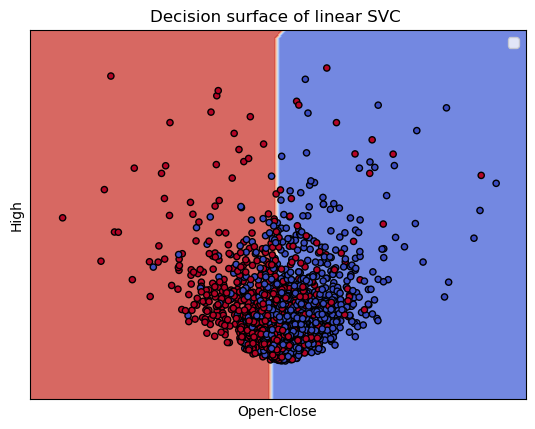

In [42]:
from sklearn import svm
from collections import Counter

def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def ggplot(x,y,clf,s,e,data):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    X0, X1 = x[:, 0], x[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(data.columns[s])
    ax.set_xlabel(data.columns[e])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

def svm_linear(data,s,e):
    X_train, X_test, y_train, y_test = split_data(data)
    X_train=np.column_stack((X_train[:,s],X_train[:,e]))
    X_test=np.column_stack((X_test[:,s],X_test[:,e]))
    model = svm.SVC(kernel = 'linear')
    svc=model.fit(X_train, y_train)
    confidence = svc.score(X_test, y_test)
    
    print('accuracy:',confidence)
    predictions = svc.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)  
  
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 
    ggplot(X_train,y_train,svc,s,e,data)


svm_linear(df,1,5)

In [43]:
def svm_poly(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = svm.SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1]))  
    
svm_poly(df)   

accuracy: 0.7511177347242921
predicted class counts: Counter({0: 417, 1: 254})
[[316  66]
 [101 188]]
Precision: 0.7577937649880095
Recall: 0.8272251308900523


In [44]:
def svm_rbf(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = svm.SVC(kernel = 'rbf')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm) 
   
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 
    
svm_rbf(df)  

accuracy: 0.5380029806259314
predicted class counts: Counter({1: 569, 0: 102})
[[ 87 295]
 [ 15 274]]
Precision: 0.8529411764705882
Recall: 0.22774869109947643


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from matplotlib.colors import ListedColormap

accuracy: 0.6795827123695977
predicted class counts: Counter({1: 346, 0: 325})
[[246 136]
 [ 79 210]]
Precision: 0.7569230769230769
Recall: 0.643979057591623


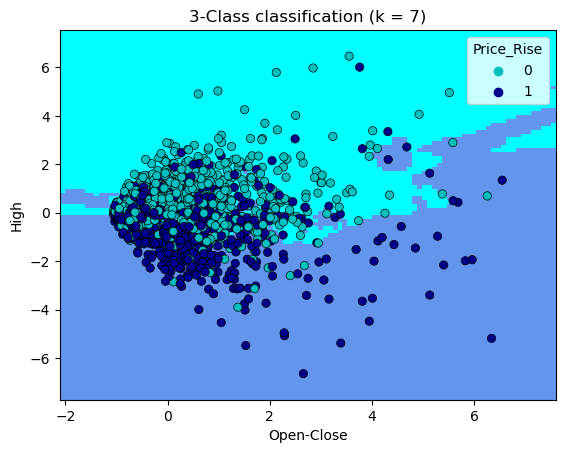

In [46]:
def knn(data,s,e):
    X_train, X_test, y_train, y_test = split_data(data)
    X_train=np.column_stack((X_train[:,s],X_train[:,e]))
    X_test=np.column_stack((X_test[:,s],X_test[:,e]))
    n = 7
    model = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 2)
    knn=model.fit(X_train, y_train)
    confidence = knn.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = knn.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1]))
    cmap_light = ListedColormap(["cyan", "cornflowerblue"])
    cmap_bold = ["c", "darkblue"]

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=data.columns[s],
        ylabel=data.columns[e],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i)" % (n)
    )
    plt.show()

knn(df,5,1)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 0.7302533532041728
predicted class counts: Counter({0: 377, 1: 294})
[[289  93]
 [ 88 201]]
Precision: 0.76657824933687
Recall: 0.756544502617801


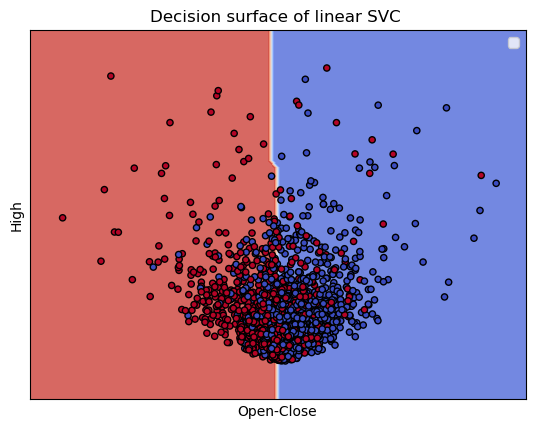

In [48]:
def linear(data,s,e):
    
    X_train, X_test, y_train, y_test = split_data(data)
    X_train=np.column_stack((X_train[:,s],X_train[:,e]))
    X_test=np.column_stack((X_test[:,s],X_test[:,e]))
    model = LogisticRegression(random_state = 0)
    lin=model.fit(X_train, y_train)
    confidence = lin.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = lin.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm) 
   
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 
    ggplot(X_train,y_train,lin,s,e,data)

linear(df,1,5)